# Data Wrangling and Analysis: WeRateDogs ([@dog_rates][1])

> _By Ambar Canonicco_
***
Welcome to this academic project meant to develop and demonstrate my skills on wrangling and cleaning data using Python code to further perform proper analysis.

[1]:https://twitter.com/dog_rates "WeRateDogs Twitter Account"

<a id='table_of_contents'></a>
### Table of Contents
- [Introduction][1]
- [Gathering Data][2]
- [Assessing Data][3]
- [Cleaning Data][4]
- [Analyzing Data][5]
- [Insights][6]
- [Conclusion][7]
- [Findings Report][8]
- [Data Repository][9]


[1]:#introduction
[2]:#gather
[3]:#assess
[4]:#clean
[5]:#analysis
[6]:#insights
[7]:#conclusion
[8]:./data/
[9]:./data/

<a id='introduction'></a>
### Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in this Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries, you'll see).

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? ```◖ᵔᴥᵔ◗``` Because "they're good dogs Brent."  [```# knowyourmeme```][1]
> WeRateDogs has over 8 million followers and has received international media coverage.

After performing the wrangling phase of the project, I will decide which questions I think could be answered from the final clean data recollected with my efforts and share the insighful findings with you.

Be ready!

[1]: https://knowyourmeme.com/memes/theyre-good-dogs-brent

In [1]:
# Import all necesary (or possible) libraries
import pandas as pd # DataFrames
import numpy as np # Number arrays
import matplotlib.pyplot as plt # Fancy Plots
import seaborn as sns # Fancier Plots
import requests as rqs # "HTTP library for Python, built with ♥"}
import json # encoder "easy for humans to read and write"
from IPython.display import display as dpl # print distant cousin
from IPython.display import Image as img # jupyter scrapbook
from IPython.display import HTML # More display libraries
import matplotlib.dates as mdates # More plot libraries
import time # tick tock
from datetime import datetime # Time passess
import tweepy # Access Twitter API for dummies
import re # regex library
%matplotlib inline

In [2]:
# Time at the beginning of the code to track elapsed time
notebk_time = time.time()

In [3]:
# Define some functions to show all columns and/or rows when a dataframe is displayed
def full(x):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)
    dpl(x)
    pd.reset_option('display.max_columns')
    pd.reset_option('display.max_rows')

def fullcols(x):
    pd.set_option('display.max_columns', None)
    dpl(x)
    pd.reset_option('display.max_columns')

<a id='gather'></a>
### Gathering Data

To start this project I will gather all the files collected and import it into the notebook so I can work with the data. 

We are going to start with the WeRateDogs twitter archive, which has been provided to me as a .csv file. The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contains though: each tweet's text, which was used to extrac rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced".

I will programmatically download a tweet image prediction file with a URL that I received. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images).

Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But I, because I have the WeRateDogs Twitter archive and specifically the tweet IDs within it, can gather this data for all 5000+. And guess what? I am going to query Twitter's API to gather this valuable data using the Tweepy library.

In [4]:
# Store available data paths
# WeRateDogs twitter archive
d_1 = './data/twitter-archive-enhanced.csv'
# Tweet image prediction file and where I am going to store it
d2_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
d_2 = './data/image-predictions.tsv'
# Where I am going to store the Twitter API collected data
d_3 = './data/tweet_json.txt'

In [5]:
# request Tweet image prediction file
r = rqs.get(d2_url)
# store the file in the path
open(d_2, 'wb').write(r.content);

In [6]:
# Read data_1 and data_2 into working variables
df1_raw = pd.read_csv(d_1, sep = ',')
df2_raw = pd.read_csv(d_2, sep = '\t')

In [7]:
# Preview data_1 to confirm that it was properly read
df1_raw.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [8]:
# Preview data_2 to confirm that it was properly read
df2_raw.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [46]:
# DO NOT RUN THIS CELL, PLEASE RUN THE ABOVE AND THEN THE BELOW CELLS. Unless you have half an hour to spend ( ͡° ͜ʖ ͡°) 

# Twitter API
# keys and secrets are stored in creds.py
import creds
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file

auth = tweepy.OAuthHandler(creds.consumer_key, creds.consumer_secret)
auth.set_access_token(creds.access_token, creds.access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1_raw.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = time.time()

# Save each tweet's returned JSON as a new line in a .txt file and prints the log in another
with open('./data/tweet_json.txt', 'w') as outfile:
    with open('./data/twitter-query-log.txt', 'a+') as api_log:
        # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
        for tweet_id in tweet_ids:
            count += 1
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                api_log.write(str(count) + ": " + str(tweet_id) + " - Success\n")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                api_log.write(str(count) + ": " + str(tweet_id) + " - Fail\n")
                fails_dict[tweet_id] = e
                pass
print(round((time.time() - start)/60,1),' minutes')
print(fails_dict)

1916.1524798870087
{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 851953902622658560: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}],), 844704788403113984: TweepError([{'code':

In [9]:
# Read data into working variables
with open(d_3) as f_in :
    df3_raw = pd.read_json(f_in, lines=True)

In [10]:
# Preview data_3 to confirm that it was properly read
fullcols(df3_raw.head(2))

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36309,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336193,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,7729,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31298,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343426,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,5720,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


<a id='assess'></a>
### Assessing Data



During this phase I am going to take a closer look at the data to assess quality of the data, which can be expanded into four main dimensions:

|            | Completeness | Validity | Accuracy | Consistency |
| ---------: | :--          | :--      | :--      | :--         |
| **Issues** | Missing data | Data that makes no sense for the observation | Even though it could be valid and make sense, data that is not true or do not belong to the observation |The data may be correct but is not formatted in the same way, is not standarized across de dataset | 

On the other hand, we can encounter with tidy data, which is more reffered to messy and not-user-friendly data. The information may be complete, valid, accurate and consistent, but it is not readable, cannot be analised an/or cannot be matched with other datasets. Meaning, in general, issues with data structure or semantics. We learned that *Each variable must have its own column, each observation must have its own row, and each type of observational unit should be stored in its own table.*

> _I was requested to identify and clean at least 8 quality issues and at least 2 tidiness issues in this dataset. I performed this assessment using the following code cells. However, you can read my notes in this section._

- Quality issues
    1. Columns ```contributors, coordinates, geo, quoted_status, quoted_status_id, quoted_status_id_str, place, quoted_status_permalink``` are empty.
    1. Twenty-three tweets are replies.
    1. Dogs names column have 'none' and letters that do not form words.
    1. The ```timestamp``` column is stored as string.
    1. Also this after the time ends with a '+0000' string.
    1. Dog breed image predictons ```p1, p2, p3``` contains predictions of items that are not dog breeds.
    1. These predictions have inconsistently in upper, lower or title cases.
    1. Additionally, have underscores for spaces when breeds, or other rare stuff, have more than one word.
    1. Seventy-two tweets are retweets.
    1. Max numerator is 1776.
    1. The tweet_id is stored as int.
    1. In the ```rating_denominator``` column, though they are usually /10, there are 15 different ratings up to 170.
    1. The ```possibly_sensitive``` and ```possibly_sensitive_appealable``` columns are all zeros.

<br />

- Tidiness issues
    1. Columns ```text``` and ```full_text``` may be the same.
    1. Our three raw datasets belong to the same type of observational unit "a tweet".
    1. There is a variable that we will call ```dog_stage``` that is spread in 4 columns ```doggo, floofer, pupper and puppo```.
    1. The ```columns entities``` and ```extended_entities``` has a dictionary within each cell.
    1. ```user``` column hides very interesting information on the user.
    1. As all of the tweets are from the same user, this information should go in a different table. 

<br />

These observations above were noted after joining all the data together in the same data frame and may have been completed in different times of the assessing process. Do not be scared if they are not treated sequencially through the code! Although you will not get lost while reading the code ```•ᴗ•```

<br />

In [11]:
# Read the log file I've created
apilog = pd.read_csv('./data/twitter-query-log.txt','r', header = None)

In [12]:
# Parsing the log file
apilog = apilog[0].str.split(':', expand = True)
apilog = apilog[1].str.split('-', expand = True)
apilog.columns = ['id','status']

In [13]:
# Count values in log file to check how many fails
apilog.status.value_counts()

 Success    2331
 Fail         25
Name: status, dtype: int64

> _Noted that 25 ids failed during the api activity_

In [14]:
# set tweet id as index for all data
df1_raw = df1_raw.set_index('tweet_id')
df2_raw = df2_raw.set_index('tweet_id')
df3_raw = df3_raw.set_index('id')
dpl(df1_raw.head(1))
dpl(df2_raw.head(1))
dpl(df3_raw.head(1))

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
tweet_id,,,,,,,,,,,
666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36309,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,NaN,NaN,NaN,NaN,7729,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [15]:
# Join all sources into one table
df = (df1_raw.join(
    df2_raw, how = 'inner', lsuffix='_1', rsuffix='_2')).join (
    df3_raw, how = 'inner', rsuffix='_3')
fullcols(df)

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,id_str,in_reply_to_screen_name,in_reply_to_status_id_3,in_reply_to_status_id_str,in_reply_to_user_id_3,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source_3,truncated,user
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",36309,False,This is Phineas. He's a mystical boy. Only eve...,NaN,892420643555336192,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,7729,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",31298,False,This is Tilly. She's just checking pup on you....,NaN,892177421306343424,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,5720,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",23578,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,891815181378084864,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,3786,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",39618,False,This is Darla. She commenced a snooze mid meal...,NaN,891689557279858688,None,NaN,NaN,NaN,NaN,False,en,None,0.0,0.0,NaN,NaN,NaN,NaN,7890,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"

In [16]:
# Reformat number display to decimal and not scientific
pd.options.display.float_format = '{:.2f}'.format

In [17]:
# Check for information on dataframe
full(df.info())
full(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 892420643555336193 to 666020888022790149
Data columns (total 58 columns):
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2059 non-null object
source                           2059 non-null object
text                             2059 non-null object
retweeted_status_id              72 non-null float64
retweeted_status_user_id         72 non-null float64
retweeted_status_timestamp       72 non-null object
expanded_urls                    2059 non-null object
rating_numerator                 2059 non-null int64
rating_denominator               2059 non-null int64
name                             2059 non-null object
doggo                            2059 non-null object
floofer                          2059 non-null object
pupper                           2059 non-null object
puppo                            2059 non-null object
jpg_ur

None

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,contributors,coordinates,favorite_count,geo,id_str,in_reply_to_status_id_3,in_reply_to_status_id_str,in_reply_to_user_id_3,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,23.00,23.00,72.00,72.00,2059.00,2059.00,2059.00,2059.00,2059.00,2059.00,0.00,0.00,2059.00,0.00,2059.00,23.00,23.00,23.00,23.00,2059.00,2059.00,0.00,0.00,2059.00
mean,697811153875140736.00,4196983835.00,762124596667010944.00,10936972768270904.00,12.26,10.52,1.20,0.59,0.13,0.06,nan,nan,8008.93,nan,737834542426394496.00,697811153875140736.00,697811153875140736.00,4196983835.00,4196983835.00,0.00,0.00,nan,nan,2593.96
std,43593835628401896.00,0.00,58740997955524048.00,92803260143106704.00,40.84,7.20,0.56,0.27,0.10,0.05,nan,nan,12095.16,nan,67584106893064992.00,43593835628401896.00,43593835628401896.00,0.00,0.00,0.00,0.00,nan,nan,4530.97
min,667152164079423488.00,4196983835.00,667509364010450944.00,783214.00,0.00,2.00,1.00,0.04,0.00,0.00,nan,nan,0.00,nan,666020888022790144.00,667152164079423488.00,667152164079423488.00,4196983835.00,4196983835.00,0.00,0.00,nan,nan,11.00
25%,673241069914580992.00,4196983835.00,710673828503034880.00,4196983835.00,10.00,10.00,1.00,0.36,0.05,0.02,nan,nan,1524.50,nan,676250470523015168.00,673241069914580992.00,673241069914580992.00,4196983835.00,4196983835.00,0.00,0.00,nan,nan,555.00
50%,675707330206547968.00,4196983835.00,776898769598197760.00,4196983835.00,11.00,10.00,1.00,0.59,0.12,0.05,nan,nan,3528.00,nan,711306686208872448.00,675707330206547968.00,675707330206547968.00,4196983835.00,4196983835.00,0.00,0.00,nan,nan,1228.00
75%,703148942731661312.00,4196983835.00,797147667415614464.00,4196983835.00,12.00,10.00,1.00,0.84,0.20,0.09,nan,nan,9992.00,nan,792898596584728576.00,703148942731661312.00,703148942731661312.00,4196983835.00,4196983835.00,0.00,0.00,nan,nan,2984.00
max,855818117272018944.00,4196983835.00,876850772322988032.00,787461778435289088.00,1776.00,170.00,4.00,1.00,0.49,0.27,nan,nan,156724.00,nan,892420643555336192.00,855818117272018944.00,855818117272018944.00,4196983835.00,4196983835.00,0.00,0.00,nan,nan,78107.00


In [18]:
# Confirm if the unique value in this column can be dropped
pd.DataFrame(df['place'].dropna())

,place
763183847194451968,"{'id': '7356b662670b2c31', 'url': 'https://api..."


In [19]:
# Get dog names counts
df['name'].value_counts()

None         573
a             55
Charlie       10
Tucker        10
Oliver        10
Penny         10
Cooper        10
Lucy           9
Bo             8
Lola           8
Sadie          8
Winston        8
Daisy          7
the            7
an             7
Toby           7
Koda           6
Rusty          6
Jax            6
Stanley        6
Bailey         6
Dave           6
Scout          6
Bella          6
Milo           6
Louis          5
Leo            5
Alfie          5
Buddy          5
Oscar          5
            ... 
Randall        1
Diogi          1
Timison        1
Benny          1
Pete           1
Maks           1
Farfle         1
Stefan         1
Steve          1
Shnuggles      1
Staniel        1
Georgie        1
BeBe           1
Al             1
Nigel          1
Charleson      1
Rupert         1
Mosby          1
Pancake        1
Travis         1
Angel          1
Margo          1
Wishes         1
Ruffles        1
Sprinkles      1
Obi            1
Tebow          1
Ed            

In [20]:
# Count how many different denominators there are
len(df['rating_denominator'].value_counts())

15

In [21]:
# Get counts of unique values in predictor columns
dpl(df['p1'].value_counts())
dpl(df['p2'].value_counts())
dpl(df['p3'].value_counts())

golden_retriever             150
Labrador_retriever            97
Pembroke                      88
Chihuahua                     81
pug                           57
chow                          44
Samoyed                       42
toy_poodle                    38
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                25
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
teddy                         18
beagle                        18
Staffordshire_bullterrier     18
Eskimo_dog                    18
Maltese_dog                   18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

Labrador_retriever                104
golden_retriever                   90
Cardigan                           73
Chihuahua                          44
Pomeranian                         41
Chesapeake_Bay_retriever           41
French_bulldog                     40
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
Eskimo_dog                         27
collie                             27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
chow                               20
miniature_pinscher                 20
Samoyed                            20
malinois                           20
Norwegian_elkhound                 19
toy_terrier                        19
American_Staffordshire_terrier     19
Boston_bull                        18
Staffordshir

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kuvasz                            34
kelpie                            34
Staffordshire_bullterrier         32
chow                              32
beagle                            29
Pekinese                          29
cocker_spaniel                    29
toy_poodle                        29
Pomeranian                        28
Pembroke                          27
Great_Pyrenees                    27
French_bulldog                    26
malamute                          26
American_Staffordshire_terrier    24
Chesapeake_Bay_retriever          24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
Siberian_husky                    19
toy_terrier                       19
Shetland_sheepdog                 17
Boston_bull                       17
d

<a id='clean'></a>
### Cleaning Data

During this section I will address the issues found in the assessment phase and clean any more issues that I encounter in my path.

In [22]:
# Getting rid of fully empty columns and place column
df = df.dropna(axis = 1, how = 'all').drop('place', axis=1)
fullcols(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 892420643555336193 to 666020888022790149
Data columns (total 50 columns):
in_reply_to_status_id            23 non-null float64
in_reply_to_user_id              23 non-null float64
timestamp                        2059 non-null object
source                           2059 non-null object
text                             2059 non-null object
retweeted_status_id              72 non-null float64
retweeted_status_user_id         72 non-null float64
retweeted_status_timestamp       72 non-null object
expanded_urls                    2059 non-null object
rating_numerator                 2059 non-null int64
rating_denominator               2059 non-null int64
name                             2059 non-null object
doggo                            2059 non-null object
floofer                          2059 non-null object
pupper                           2059 non-null object
puppo                            2059 non-null object
jpg_ur

None

In [23]:
# Getting rid of replies
df = df[df['in_reply_to_status_id'].notnull() == False]
df.shape

(2036, 50)

In [24]:
# Getting rid of retweets
df = df[df['retweeted_status_id'].notnull() == False]
df.shape

(1964, 50)

In [25]:
# Getting rid of new full empty columns
df = df.dropna(axis = 1, how = 'all')
fullcols(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 892420643555336193 to 666020888022790149
Data columns (total 39 columns):
timestamp                        1964 non-null object
source                           1964 non-null object
text                             1964 non-null object
expanded_urls                    1964 non-null object
rating_numerator                 1964 non-null int64
rating_denominator               1964 non-null int64
name                             1964 non-null object
doggo                            1964 non-null object
floofer                          1964 non-null object
pupper                           1964 non-null object
puppo                            1964 non-null object
jpg_url                          1964 non-null object
img_num                          1964 non-null int64
p1                               1964 non-null object
p1_conf                          1964 non-null float64
p1_dog                           1964 non-null bool
p2

None

In [26]:
# Fixing timestamp dtype
df['timestamp'] = df['timestamp'].copy().apply(lambda x: x[0:len(x)-6])
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['timestamp'].head(2)

892420643555336193   2017-08-01 16:23:56
892177421306343426   2017-08-01 00:17:27
Name: timestamp, dtype: datetime64[ns]

In [27]:
# Getting rid of possibly_sensitive and possibly_sensitive_appealable columns
df = df.drop(['possibly_sensitive','possibly_sensitive_appealable'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 892420643555336193 to 666020888022790149
Data columns (total 37 columns):
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object

In [28]:
# Fixing predictions format
df['p1'] = df['p1'].str.lower().str.replace('_',' ')
df['p2'] = df['p2'].str.lower().str.replace('_',' ')
df['p3'] = df['p3'].str.lower().str.replace('_',' ')
fullcols(df.sample(5))

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,id_str,is_quote_status,lang,retweet_count,retweeted,source_3,truncated,user
678764513869611008,2015-12-21 02:30:45,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None,https://pbs.twimg.com/media/CWt0ubZWcAAkFER.jpg,1,irish terrier,0.70,True,australian terrier,0.07,True,irish setter,0.06,True,2015-12-21 02:30:45,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 678764509826281472, 'id_str'...",1622,False,Meet Wilson. He got caught humping the futon. ...,678764513869611008,False,en,468,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
860524505164394496,2017-05-05 16:00:04,"<a href=""http://twitter.com/download/iphone"" r...",This is Carl. He likes to dance. Doesn't care ...,https://twitter.com/dog_rates/status/860524505...,13,10,Carl,None,None,None,None,https://pbs.twimg.com/media/C_EyeKuXkAAdxY-.jpg,1,bedlington terrier,0.29,True,toy poodle,0.24,True,lakeland terrier,0.09,True,2017-05-05 16:00:04,"[0, 97]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 860524497660776448, 'id_str'...",22765,False,This is Carl. He likes to dance. Doesn't care ...,860524505164394496,False,en,5047,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
717537687239008257,2016-04-06 02:21:30,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None,https://pbs.twimg.com/media/CfU0t75W4AAUo9V.jpg,1,golden retriever,0.78,True,labrador retriever,0.05,True,kuvasz,0.05,True,2016-04-06 02:21:30,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717537679412486144, 'id_str'...",5758,False,People please. This is a Deadly Mediterranean ...,717537687239008256,False,en,1846,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
717841801130979328,2016-04-06 22:29:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Barclay. His father was a banana. 11/1...,https://twitter.com/dog_rates/status/717841801...,11,10,Barclay,None,None,None,None,https://pbs.twimg.com/media/CfZJTphWAAAl5Ys.jpg,1,brittany spaniel,0.92,True,english springer,0.07,True,bath towel,0.00,False,2016-04-06 22:29:56,"[0, 84]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 717841792524222464, 'id_str'...",2453,False,This is Barclay. His father was a banana. 11/1...,717841801130979328,False,en,603,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
669753178989142016,2015-11-26 05:42:55,"<a href=""http://twitter.com/download/iphone"" r...",Meet Chester. He just ate a lot and now he can...,https://twitter.com/dog_rates/status/669753178...,10,10,Chester,None,None,None,None,https://pbs.twimg.com/media/CUtw9SAVEAAtFUN.jpg,1,pembroke,0.86,True,hamster,0.03,False,shetland sheepdog,0.02,True,2015-11-26 05:42:55,"[0, 124]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 669753167702200320, 'id_str'...",783,False,Meet Chester. He just ate a lot and now he can...,669753178989142016,False,en,377,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [29]:
# Reformat entities column
df.entities.head(1)

892420643555336193    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, dtype: object

In [30]:
# Reformat entities column (cont.)
def fullcell(dataframe,column,index):
    pd.set_option('display.max_colwidth', len(dataframe[column][0:1]))
    dpl(dataframe[column][index])
    pd.reset_option('display.max_colwidth')

In [31]:
# Review the contents of one cell in entities
fullcell(df,'entities',892420643555336193)

{'hashtags': [],
 'symbols': [],
 'user_mentions': [],
 'urls': [],
 'media': [{'id': 892420639486877696,
   'id_str': '892420639486877696',
   'indices': [86, 109],
   'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
   'url': 'https://t.co/MgUWQ76dJU',
   'display_url': 'pic.twitter.com/MgUWQ76dJU',
   'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
   'type': 'photo',
   'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
    'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
    'small': {'w': 540, 'h': 528, 'resize': 'fit'},
    'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}

In [32]:
# Reformat entities column (cont.)
df[['hashtags', 'symbols', 'user_mentions', 'urls', 'media']] = df.entities.apply(pd.Series)
df = df.drop('entities', axis=1)
fullcols(df.head(3))

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,display_text_range,extended_entities,favorite_count,favorited,full_text,id_str,is_quote_status,lang,retweet_count,retweeted,source_3,truncated,user,hashtags,symbols,user_mentions,urls,media
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False,2017-08-01 16:23:56,"[0, 85]","{'media': [{'id': 892420639486877696, 'id_str'...",36309,False,This is Phineas. He's a mystical boy. Only eve...,892420643555336192,False,en,7729,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],[],[],[],"[{'id': 892420639486877696, 'id_str': '8924206..."
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.32,True,pekinese,0.09,True,papillon,0.07,True,2017-08-01 00:17:27,"[0, 138]","{'media': [{'id': 892177413194625024, 'id_str'...",31298,False,This is Tilly. She's just checking pup on you....,892177421306343424,False,en,5720,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],[],[],[],"[{'id': 892177413194625024, 'id_str': '8921774..."
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True,2017-07-31 00:18:03,"[0, 121]","{'media': [{'id': 891815175371796480, 'id_str'...",23578,False,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,False,en,3786,False,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],[],[],[],"[{'id': 891815175371796480, 'id_str': '8918151..."


In [33]:
# Extended_entities contains the same information than in media output form entities, I am getting rid of this column
df = df.drop('extended_entities', axis=1)

In [34]:
# As only relevant data from media column is image url, which I already have, I will get rid of that column
df = df.drop('media', axis=1)

In [35]:
def getDuplicateColumns(fd):

#     Get a list of duplicate columns.
#     It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
#     :param df: Dataframe object
#     :return: List of columns whose contents are duplicates.

    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(fd.shape[1]):
        # Select column at xth index.
        col = fd.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, fd.shape[1]):
            # Select column at yth index.
            otherCol = fd.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(fd.columns.values[y])
 
    return list(duplicateColumnNames)

In [36]:
# I am getting rid of the duplicate columns with the weirder name. Follow me the trip!
getDuplicateColumns(df)

['retweeted',
 'source_3',
 'truncated',
 'full_text',
 'is_quote_status',
 'created_at']

In [37]:
# Trip (cont.)
(df.source == df.source_3).value_counts()
# No surprise they are duplicated!

True    1964
dtype: int64

In [38]:
# Trip (cont.)
df = df.drop('source_3', axis = 1) # Remove duplicate columns

In [39]:
# Trip (cont.)
df.retweeted.value_counts() # Remove duplicate columns

False    1964
Name: retweeted, dtype: int64

In [40]:
# Trip (cont.)
(((df.retweeted == df.is_quote_status) == df.truncated) == df.favorited).value_counts() # Confirm columns are duplicated
# I imagined that are different things, still they are all fully false
# then it is information not relevant for analysis, they go!

True    1964
dtype: int64

In [41]:
# Trip (cont.)
df = df.drop(['retweeted','is_quote_status','truncated','favorited'], axis = 1)  # Remove duplicate columns

In [42]:
# Trip (cont.)
(df.text == df.full_text).value_counts() # Confirm columns are duplicated

True    1964
dtype: int64

In [43]:
# Trip (cont.)
df = df.drop('full_text', axis = 1) # Remove duplicate columns

In [44]:
# Trip (cont.)
(df.timestamp == df.created_at).value_counts() # Confirm columns are duplicated

True    1964
dtype: int64

In [45]:
# Trip (cont.)
df.created_at.head() # Review datatype and format of created_at

892420643555336193   2017-08-01 16:23:56
892177421306343426   2017-08-01 00:17:27
891815181378084864   2017-07-31 00:18:03
891689557279858688   2017-07-30 15:58:51
891327558926688256   2017-07-29 16:00:24
Name: created_at, dtype: datetime64[ns]

> *And just found out that ```created_at``` was already formatted for date and time, even before I had to reformat ```timestamp```, and they are the same data. **ಥ﹏ಥ** I guess those are the wonders of being a data analyst.*

In [46]:
df = df.drop('created_at', axis = 1) # Remove duplicate columns

In [47]:
# Let's come back from the trip
dpl(df.info())
fullcols(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 892420643555336193 to 666020888022790149
Data columns (total 32 columns):
timestamp             1964 non-null datetime64[ns]
source                1964 non-null object
text                  1964 non-null object
expanded_urls         1964 non-null object
rating_numerator      1964 non-null int64
rating_denominator    1964 non-null int64
name                  1964 non-null object
doggo                 1964 non-null object
floofer               1964 non-null object
pupper                1964 non-null object
puppo                 1964 non-null object
jpg_url               1964 non-null object
img_num               1964 non-null int64
p1                    1964 non-null object
p1_conf               1964 non-null float64
p1_dog                1964 non-null bool
p2                    1964 non-null object
p2_conf               1964 non-null float64
p2_dog                1964 non-null bool
p3                    1964 non-null object

None

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,id_str,lang,retweet_count,user,hashtags,symbols,user_mentions,urls
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False,"[0, 85]",36309,892420643555336192,en,7729,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],[],[],[]
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.32,True,pekinese,0.09,True,papillon,0.07,True,"[0, 138]",31298,892177421306343424,en,5720,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],[],[],[]
891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.72,True,malamute,0.08,True,kelpie,0.03,True,"[0, 121]",23578,891815181378084864,en,3786,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],[],[],[]
891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.17,False,labrador retriever,0.17,True,spatula,0.04,False,"[0, 79]",39618,891689557279858688,en,7890,"{'id': 4196983835, 'id_str': '4196983835', 'na...",[],[],[],[]
891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.56,True,english springer,0.23,True,german short-haired pointer,0.18,True,"[0, 138]",37819,891327558926688256,en,8508,"{'id': 4196983835, 'id_str': '4196983835', 'na...","[{'text': 'BarkWeek', 'indices': [129, 138]}]",[],[],[]


In [48]:
# Awesome findings in this column
df.user[892420643555336193]

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/N7sNNHAEXS',
 'entities': {'url': {'urls': [{'url': 'https://t.co/N7sNNHAEXS',
     'expanded_url': 'http://weratedogs.com',
     'display_url': 'weratedogs.com',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8771383,
 'friends_count': 15,
 'listed_count': 7277,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 145978,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 12102,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url': 'http://abs.twimg.com/im

> _Maybe, some of the user information changes through the time, while he tweets, I will keep the timestamp and move the user information to another table_

In [49]:
# Create a new table for user data
wrd = df[['timestamp','user']]
df = df.drop('user', axis = 1)
wrd.head(2) # I will come back to this table later

,timestamp,user
892420643555336193,2017-08-01 16:23:56,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
892177421306343426,2017-08-01 00:17:27,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [50]:
# I will google how to move doggo, floofer, pupper and puppo where they belong!
# (as if I did not google anything else for this project above)
fullcols(df.head(2))

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,id_str,lang,retweet_count,hashtags,symbols,user_mentions,urls
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False,"[0, 85]",36309,892420643555336192,en,7729,[],[],[],[]
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.32,True,pekinese,0.09,True,papillon,0.07,True,"[0, 138]",31298,892177421306343424,en,5720,[],[],[],[]


In [51]:
# Exploring
df['dog_stage'] = df['text'].str.extract('(doggo|floofer|pupper|puppo)')
fullcols(df.sample(5))

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,id_str,lang,retweet_count,hashtags,symbols,user_mentions,urls,dog_stage
696488710901260288,2016-02-08 00:20:23,"<a href=""http://twitter.com/download/iphone"" r...",12/10 revolutionary af https://t.co/zKzq4nIY86,https://twitter.com/dog_rates/status/696488710...,12,10,None,None,None,None,None,https://pbs.twimg.com/media/CapsyfkWcAQ41uC.jpg,1,briard,0.37,True,scotch terrier,0.17,True,giant schnauzer,0.12,True,"[0, 46]",2534,696488710901260288,en,1017,[],[],[],[],NaN
760190180481531904,2016-08-01 19:07:17,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sadie. She's addicted to balloons. It's t...,https://twitter.com/dog_rates/status/760190180...,10,10,Sadie,None,None,None,None,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.92,False,confectionery,0.05,False,maraca,0.02,False,"[0, 113]",5746,760190180481531904,en,1824,[],[],[],[],NaN
812709060537683968,2016-12-24 17:18:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Brandi and Harley. They are practicing...,https://twitter.com/dog_rates/status/812709060...,12,10,Brandi,None,None,None,None,https://pbs.twimg.com/media/C0dSk98WEAALyya.jpg,1,irish setter,0.33,True,golden retriever,0.18,True,leonberg,0.16,True,"[0, 94]",6762,812709060537683968,en,1465,[],[],[],[],NaN
668655139528511488,2015-11-23 04:59:42,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Winifred. He is a Papyrus Hydrang...,https://twitter.com/dog_rates/status/668655139...,11,10,Winifred,None,None,None,None,https://pbs.twimg.com/media/CUeKTeYW4AEr_lx.jpg,1,beagle,0.32,True,italian greyhound,0.10,True,basenji,0.09,True,"[0, 112]",506,668655139528511488,en,210,[],[],[],[],NaN
679158373988876288,2015-12-22 04:35:49,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.27,True,bull mastiff,0.25,True,bath towel,0.12,False,"[0, 66]",21187,679158373988876288,en,7990,[],[],[],[],NaN


In [52]:
# Turned out that I could reperform that catergorization, I will drop those columns. BB!
df = df.drop(['doggo','floofer','pupper','puppo'], axis = 1)
fullcols(df.head(2))

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,id_str,lang,retweet_count,hashtags,symbols,user_mentions,urls,dog_stage
892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.10,False,bagel,0.09,False,banana,0.08,False,"[0, 85]",36309,892420643555336192,en,7729,[],[],[],[],NaN
892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.32,True,pekinese,0.09,True,papillon,0.07,True,"[0, 138]",31298,892177421306343424,en,5720,[],[],[],[],NaN


In [53]:
# hashtags	symbols	user_mentions	urls Out! These columns look awfully useless for the current analysis
# There is no missing data, it is just that its values applies to very few tweets to take them into consideration
df = df.drop(['hashtags','symbols','user_mentions','urls'], axis = 1)

In [54]:
# Back to original cleaning. Let's fix the weird dogs names
df['name'] = df.name.str.replace('^[a-z]+', 'None') # replace characters except a-z for None
df['name'].value_counts()

None         622
Charlie       10
Cooper        10
Oliver        10
Penny          9
Lucy           9
Tucker         9
Winston        8
Sadie          8
Daisy          7
Lola           7
Toby           7
Stanley        6
Koda           6
Bella          6
Bo             6
Jax            6
Chester        5
Milo           5
Oscar          5
Rusty          5
Leo            5
Dave           5
Scout          5
Louis          5
Bailey         5
Buddy          5
Bear           4
Gary           4
Jack           4
            ... 
Samsom         1
Ralf           1
Karl           1
Nico           1
Randall        1
Aqua           1
Ralphie        1
Ed             1
Rupert         1
Stubert        1
Steve          1
Shnuggles      1
Staniel        1
Georgie        1
BeBe           1
Al             1
Nigel          1
Fletcher       1
Mosby          1
Tebow          1
Pancake        1
Travis         1
Angel          1
Margo          1
Klein          1
Wishes         1
Ruffles        1
Sprinkles     

In [55]:
# Convert numerators into real ratings
float_ratings_txt = []
float_ratings_index = []
float_ratings = []

for i, text in df['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)): # find strings with the format number.number / number (d is for digit)
        float_ratings_txt.append(text)
        float_ratings_index.append(i)
        float_ratings.append(re.search('\d+\.\d+', text).group())
        
float_ratings_txt

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [56]:
# As they are only four I can make the changes manually one by one
df.loc[float_ratings_index[0],'rating_numerator'] = float(float_ratings[0])
df.loc[float_ratings_index[1],'rating_numerator'] = float(float_ratings[1])
df.loc[float_ratings_index[2],'rating_numerator'] = float(float_ratings[2])
df.loc[float_ratings_index[3],'rating_numerator'] = float(float_ratings[3])

In [57]:
# Review
fullcols(df.describe())

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,favorite_count,id_str,retweet_count
count,1964.00,1964.00,1964.00,1964.00,1964.00,1964.00,1964.00,1964.00,1964.00
mean,12.18,10.48,1.20,0.59,0.13,0.06,8349.75,735815447737804672.00,2479.94
std,41.68,6.87,0.56,0.27,0.10,0.05,12271.00,67441909734671256.00,4431.03
min,0.00,2.00,1.00,0.04,0.00,0.00,72.00,666020888022790144.00,11.00
25%,10.00,10.00,1.00,0.36,0.05,0.02,1788.00,675839934874424320.00,554.00
50%,11.00,10.00,1.00,0.59,0.12,0.05,3775.50,708724616318058496.00,1198.50
75%,12.00,10.00,1.00,0.85,0.20,0.09,10376.75,787740840954390528.00,2834.50
max,1776.00,170.00,4.00,1.00,0.49,0.27,156724.00,892420643555336192.00,78107.00


In [58]:
# Check for maximum rating numerator
df[df['rating_numerator'] == max(df['rating_numerator'])]

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,id_str,lang,retweet_count,dog_stage
749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.00,10,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow tie,...,False,sunglass,0.05,False,"[0, 54]",5153,749981277374128128,en,2480,NaN


In [59]:
# Checking that 'weird' numbers are correct. What can I say? 'They're good dogs Brent'
fullcell(df,'text',749981277374128128)

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [60]:
# Check for maximum rating denominator
df[df['rating_denominator'] == max(df['rating_denominator'])]

,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,...,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,id_str,lang,retweet_count,dog_stage
731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204.00,170,None,https://pbs.twimg.com/media/CiWWhVNUYAAab_r.jpg,1,lakeside,...,False,king penguin,0.05,False,"[0, 97]",3834,731156023742988288,en,1263,doggo


In [61]:
# Check if high denominator is ok
fullcell(df,'text',731156023742988288) # They are still good dogs...

'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv'

In [62]:
# Create a different rate standard
df['rating'] = df['rating_numerator']/df['rating_denominator']
df = df.drop(['rating_numerator','rating_denominator'], axis = 1)
fullcols(df.sample(3))

,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,display_text_range,favorite_count,id_str,lang,retweet_count,dog_stage,rating
681523177663676416,2015-12-28 17:12:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Carly. She's actually 2 dogs fused tog...,https://twitter.com/dog_rates/status/681523177...,Carly,https://pbs.twimg.com/media/CXVBtX_WwAEuqbP.jpg,1,norfolk terrier,0.21,True,german shepherd,0.16,True,chow,0.16,True,"[0, 140]",14277,681523177663676416,en,5747,NaN,1.20
714214115368108032,2016-03-27 22:14:49,"<a href=""http://twitter.com/download/iphone"" r...",Happy Easter from the squad! 🐇🐶 13/10 for all ...,https://twitter.com/dog_rates/status/714214115...,None,https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg,1,pug,0.53,True,bloodhound,0.16,True,german shepherd,0.05,True,"[0, 69]",2264,714214115368108032,en,869,NaN,1.30
697242256848379904,2016-02-10 02:14:42,"<a href=""http://twitter.com/download/iphone"" r...",This is Oakley. He has a massive tumor growing...,https://twitter.com/dog_rates/status/697242256...,Oakley,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,1,grey fox,0.24,False,siamese cat,0.17,False,eskimo dog,0.06,True,"[0, 130]",2512,697242256848379904,en,670,NaN,1.00


In [63]:
# Drop display_text_range column
df = df.drop('display_text_range', axis = 1) # I really do not know what it means

In [64]:
fullcols(df.sample(5))

,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,id_str,lang,retweet_count,dog_stage,rating
793120401413079041,2016-10-31 16:00:13,"<a href=""http://twitter.com/download/iphone"" r...",This is Robin. She's desperately trying to do ...,https://twitter.com/dog_rates/status/793120401...,Robin,https://pbs.twimg.com/media/CwG6zDfWcAA8jBD.jpg,1,labrador retriever,0.72,True,golden retriever,0.17,True,kuvasz,0.04,True,12993,793120401413079040,en,4023,NaN,1.10
713411074226274305,2016-03-25 17:03:49,"<a href=""http://twitter.com/download/iphone"" r...",Here we see an extremely rare Bearded Floofmal...,https://twitter.com/dog_rates/status/713411074...,None,https://pbs.twimg.com/media/CeaLlAPUMAIcC7U.jpg,1,great pyrenees,0.72,True,samoyed,0.13,True,kuvasz,0.12,True,4424,713411074226274304,en,1292,NaN,1.10
686618349602762752,2016-01-11 18:39:05,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She just saw an adult wearing ...,https://twitter.com/dog_rates/status/686618349...,Olivia,https://pbs.twimg.com/media/CYdbvwjWcAEtjYu.jpg,1,rottweiler,0.44,True,miniature pinscher,0.23,True,gordon setter,0.09,True,3706,686618349602762752,en,1362,pupper,1.10
749774190421639168,2016-07-04 01:17:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Benebop Cumberplop. 12/1...,https://twitter.com/dog_rates/status/749774190...,Lucy,https://pbs.twimg.com/media/Cme7pg2XEAATMnP.jpg,1,pekinese,0.88,True,chihuahua,0.05,True,blenheim spaniel,0.02,True,4682,749774190421639168,en,1321,NaN,1.20
819588359383371776,2017-01-12 16:54:26,"<a href=""http://twitter.com/download/iphone"" r...",This is Jazzy. She just found out that sandwic...,https://twitter.com/dog_rates/status/819588359...,Jazzy,https://pbs.twimg.com/media/C1_DQn3UoAIoJy7.jpg,1,cardigan,0.55,True,basenji,0.12,True,shetland sheepdog,0.10,True,9808,819588359383371776,en,2028,NaN,1.30


In [65]:
# get the dog breed in one column
df['dog_breed'] = 'None'

for i, row in df.iterrows():
    if row.p1_dog:
        df.at[i, 'dog_breed'] = row.p1
    elif row.p2_dog:
        df.at[i, 'dog_breed'] = row.p2
    elif row.p3_dog:
        df.at[i, 'dog_breed'] = row.p3
    else:
        df.at[i, 'dog_breed'] = 'None'

In [66]:
# Review
fullcols(df.sample(10))

,timestamp,source,text,expanded_urls,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,id_str,lang,retweet_count,dog_stage,rating,dog_breed
668645506898350081,2015-11-23 04:21:26,"<a href=""http://twitter.com/download/iphone"" r...",Incredibly rare dog here. Good at bipedalism. ...,https://twitter.com/dog_rates/status/668645506...,None,https://pbs.twimg.com/media/CUeBiqgXAAARLbj.jpg,1,ski mask,0.30,False,knee pad,0.10,False,balance beam,0.08,False,848,668645506898350080,en,510,NaN,1.10,None
699072405256409088,2016-02-15 03:27:04,"<a href=""http://twitter.com/download/iphone"" r...",ERMAHGERD 12/10 please enjoy https://t.co/7WrA...,https://twitter.com/dog_rates/status/699072405...,None,https://pbs.twimg.com/ext_tw_video_thumb/69907...,1,shih-tzu,0.60,True,pekinese,0.21,True,maltese dog,0.15,True,2975,699072405256409088,en,1191,NaN,1.20,shih-tzu
860184849394610176,2017-05-04 17:30:24,"<a href=""http://twitter.com/download/iphone"" r...",Here we have perhaps the wisest dog of all. Ab...,https://twitter.com/dog_rates/status/860184849...,None,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,chimpanzee,0.27,False,gorilla,0.10,False,orangutan,0.06,False,16086,860184849394610176,en,5563,NaN,1.40,None
668113020489474048,2015-11-21 17:05:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's that one hypocritical gym ...,https://twitter.com/dog_rates/status/668113020...,Alfie,https://pbs.twimg.com/media/CUWdPsqWcAERQVv.jpg,1,pembroke,0.55,True,cardigan,0.19,True,collie,0.06,True,645,668113020489474048,en,225,NaN,0.60,pembroke
667878741721415682,2015-11-21 01:34:35,"<a href=""http://twitter.com/download/iphone"" r...",This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,Tedrick,https://pbs.twimg.com/media/CUTILFiWcAE8Rle.jpg,1,seat belt,0.20,False,miniature pinscher,0.11,True,schipperke,0.10,True,379,667878741721415680,en,113,NaN,0.20,miniature pinscher
677644091929329666,2015-12-18 00:18:36,"<a href=""http://twitter.com/download/iphone"" r...",This is a dog swinging. I really enjoyed it so...,https://twitter.com/dog_rates/status/677644091...,None,https://pbs.twimg.com/ext_tw_video_thumb/67764...,1,chihuahua,0.63,True,italian greyhound,0.13,True,swing,0.06,False,1830,677644091929329664,en,786,NaN,1.10,chihuahua
726887082820554753,2016-05-01 21:32:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Blitz. He's a new dad struggling to co...,https://twitter.com/dog_rates/status/726887082...,Blitz,https://pbs.twimg.com/media/ChZr8SdWIAAVQKt.jpg,1,soft-coated wheaten terrier,0.52,True,irish terrier,0.16,True,chesapeake bay retriever,0.13,True,3828,726887082820554752,en,1515,NaN,1.00,soft-coated wheaten terrier
686007916130873345,2016-01-10 02:13:27,"<a href=""http://twitter.com/download/iphone"" r...",This pupper has a magical eye. 11/10 I can't s...,https://twitter.com/dog_rates/status/686007916...,None,https://pbs.twimg.com/media/CYUwjz-UAAEcdi8.jpg,1,rhodesian ridgeback,0.89,True,redbone,0.04,True,seat belt,0.01,False,2488,686007916130873344,en,412,pupper,1.10,rhodesian ridgeback
682393905736888321,2015-12-31 02:52:40,"<a href=""http://twitter.com/download/iphone"" r...",This is Kreg. He's riding an invisible jet ski...,https://twitter.com/dog_rates/status/682393905...,Kreg,https://pbs.twimg.com/media/CXhZom1UwAA4Zz6.jpg,1,vizsla,0.66,True,paddle,0.09,False,rhodesian ridgeback,0.05,True,2225,682393905736888320,en,671,NaN,1.10,vizsla
767754930266464257,2016-08-22 16:06:54,"<a href=""http://twitter.com/download/iphone"" r...",This is Philbert. His toilet broke and he does...,https://twitter.com/dog_rates/status/767754930...,Philbert,https://pbs.twimg.com/media/CqedCQWWgAIab9L.jpg,1,vizsla,0.31,True,fountain,0.14,False,chesapeake bay retriever,0.11,True,16217,767754930266464256,en,5466,NaN,1.10,vizsla


In [67]:
# I will drop image prediction now old columns
df = df.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis = 1)

In [68]:
# Checkpoint
fullcols(df.sample(5))

,timestamp,source,text,expanded_urls,name,jpg_url,img_num,favorite_count,id_str,lang,retweet_count,dog_stage,rating,dog_breed
668291999406125056,2015-11-22 04:56:43,"<a href=""http://twitter.com/download/iphone"" r...",I can't do better than he did. 10/10 https://t...,https://twitter.com/dog_rates/status/668291999...,None,https://pbs.twimg.com/media/CUZABzGW4AE5F0k.jpg,1,234,668291999406125056,en,29,NaN,1.00,None
670783437142401025,2015-11-29 01:56:48,"<a href=""http://twitter.com/download/iphone"" r...",Flamboyant pup here. Probably poisonous. Won't...,https://twitter.com/dog_rates/status/670783437...,None,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,802,670783437142401024,en,372,NaN,0.10,None
668286279830867968,2015-11-22 04:33:59,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rusty. Rusty's dreaming of a world where ...,https://twitter.com/dog_rates/status/668286279...,Rusty,https://pbs.twimg.com/media/CUY60usWoAAdBxx.jpg,1,484,668286279830867968,en,131,NaN,1.10,golden retriever
734912297295085568,2016-05-24 01:02:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Jax. He's a literal fluffball. Sneaky ...,https://twitter.com/dog_rates/status/734912297...,Jax,https://pbs.twimg.com/media/CjLuzPvUoAAbU5k.jpg,1,2746,734912297295085568,en,524,NaN,1.00,maltese dog
839990271299457024,2017-03-10 00:04:21,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sojourner. His nose is a Fibonacci Spiral...,https://twitter.com/dog_rates/status/839990271...,Sojourner,https://pbs.twimg.com/media/C6g-sX-VsAAHfJ9.jpg,2,13441,839990271299457024,en,2276,NaN,1.30,staffordshire bullterrier


In [69]:
# Drop a couple more of useless columns
df = df.drop(['source','id_str'], axis = 1)

In [70]:
# Random dog image of the day!
img(url = df.jpg_url.at[df.index[np.random.randint(0,len(df.index))]])

In [71]:
# Checkpoint
fullcols(df.dog_breed.value_counts())

None                           305
golden retriever               156
labrador retriever             104
pembroke                        94
chihuahua                       90
pug                             62
toy poodle                      49
chow                            48
samoyed                         41
pomeranian                      41
malamute                        33
chesapeake bay retriever        31
cocker spaniel                  30
french bulldog                  30
miniature pinscher              24
eskimo dog                      22
cardigan                        21
german shepherd                 21
shih-tzu                        20
beagle                          20
siberian husky                  20
staffordshire bullterrier       19
maltese dog                     19
rottweiler                      18
shetland sheepdog               18
lakeland terrier                17
kuvasz                          17
italian greyhound               17
basset              

> *I guess that now we have very good dogs ```V•ᴥ•V```*

In [72]:
# Back to the user table, let's checkpoint that
wrd.sample(5)

,timestamp,user
800388270626521089,2016-11-20 17:20:08,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
840268004936019968,2017-03-10 18:27:58,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
719551379208073216,2016-04-11 15:43:12,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
666996132027977728,2015-11-18 15:07:24,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
680913438424612864,2015-12-27 00:49:49,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [73]:
# Reformat user column
wrd[['id',
    'id_str',
    'name',
    'screen_name',
    'location',
    'description',
    'url',
    'entities',
    'description'
    'protected',
    'followers_count',
    'friends_count',
    'listed_count',
    'created_at',
    'favourites_count',
    'utc_offset',
    'time_zone',
    'geo_enabled',
    'verified',
    'statuses_count',
    'lang',
    'contributors_enabled',
    'is_translator',
    'is_translation_enabled',
    'profile_background_color',
    'profile_background_image_url',
    'profile_background_image_url_https',
    'profile_background_tile',
    'profile_image_url',
    'profile_image_url_https',
    'profile_banner_url',
    'profile_link_color',
    'profile_sidebar_border_color',
    'profile_sidebar_fill_color',
    'profile_text_color',
    'profile_use_background_image',
    'has_extended_profile',
    'default_profile',
    'default_profile_image',
    'following',
    'follow_request_sent',
    'notifications',
    'translator_type']] = wrd.user.apply(pd.Series)
wrd = wrd.copy().drop('user', axis=1)
fullcols(wrd.sample(3))

,timestamp,id,id_str,name,screen_name,location,description,url,entities,descriptionprotected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,time_zone,geo_enabled,verified,statuses_count,lang,contributors_enabled,is_translator,is_translation_enabled,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_background_tile,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,profile_sidebar_border_color,profile_sidebar_fill_color,profile_text_color,profile_use_background_image,has_extended_profile,default_profile,default_profile_image,following,follow_request_sent,notifications,translator_type
791312159183634433,2016-10-26 16:14:55,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771391,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,None,True,True,12102,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,000000,000000,000000,False,False,False,False,True,False,False,none
714982300363173890,2016-03-30 01:07:18,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771393,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,None,True,True,12102,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,000000,000000,000000,False,False,False,False,True,False,False,none
796865951799083009,2016-11-11 00:03:42,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771391,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,None,True,True,12102,None,False,False,False,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,False,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,000000,000000,000000,False,False,False,False,True,False,False,none


In [74]:
wrd = wrd.drop(getDuplicateColumns(wrd), axis = 1) # drop duplicate columns

In [75]:
# Checkpoint
fullcols(wrd.sample(5))

,timestamp,id,id_str,name,screen_name,location,description,url,entities,descriptionprotected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,geo_enabled,statuses_count,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,translator_type
733828123016450049,2016-05-21 01:13:53,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771392,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
674739953134403584,2015-12-09 23:58:35,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771439,15,7277,Sun Nov 15 21:41:29 +0000 2015,145977,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
668636665813057536,2015-11-23 03:46:18,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771482,15,7278,Sun Nov 15 21:41:29 +0000 2015,145977,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
671520732782923777,2015-12-01 02:46:33,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771442,15,7277,Sun Nov 15 21:41:29 +0000 2015,145977,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
782747134529531904,2016-10-03 01:00:34,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771391,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none


In [76]:
# Reset index and order chronologically
wrd = wrd.reset_index()
wrd = wrd.sort_values('timestamp', ascending = False)
fullcols(wrd.head(10))

,index,timestamp,id,id_str,name,screen_name,location,description,url,entities,descriptionprotected,followers_count,friends_count,listed_count,created_at,favourites_count,utc_offset,geo_enabled,statuses_count,profile_background_color,profile_background_image_url,profile_background_image_url_https,profile_image_url,profile_image_url_https,profile_banner_url,profile_link_color,translator_type
0,892420643555336193,2017-08-01 16:23:56,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771383,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
1,892177421306343426,2017-08-01 00:17:27,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8772030,15,7278,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
2,891815181378084864,2017-07-31 00:18:03,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771383,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
3,891689557279858688,2017-07-30 15:58:51,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771383,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
4,891327558926688256,2017-07-29 16:00:24,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771383,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
5,891087950875897856,2017-07-29 00:08:17,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'urls': [{'url': 'https://t.co/N7sNNH...,False,8771383,15,7277,Sun Nov 15 21:41:29 +0000 2015,145978,None,True,12102,000000,http://abs.twimg.com/images/themes/theme1/bg.png,https://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1218319284...,https://pbs.twimg.com/profile_images/121831928...,https://pbs.twimg.com/profile_banners/41969838...,F5ABB5,none
6,890971913173991426,2017-07-28 16:27:12,4196983835,4196983835,WeRateDogs®,dog_rates,「 DM YOUR DOGS 」,Your Only Source For Professional Dog Ratings ...,https://t.co/N7sNNHAEXS,{'url': {'u

In [77]:
wrd.id_str.value_counts() # Confirming that all tweets from the other table are from WeRateDogs

4196983835    1964
Name: id_str, dtype: int64

In [78]:
# filter columns 
wrd = wrd[['index','timestamp','name','followers_count']]

In [79]:
# Review
dpl(wrd.head())
dpl(wrd.shape)

,index,timestamp,name,followers_count
0,892420643555336193,2017-08-01 16:23:56,WeRateDogs®,8771383
1,892177421306343426,2017-08-01 00:17:27,WeRateDogs®,8772030
2,891815181378084864,2017-07-31 00:18:03,WeRateDogs®,8771383
3,891689557279858688,2017-07-30 15:58:51,WeRateDogs®,8771383
4,891327558926688256,2017-07-29 16:00:24,WeRateDogs®,8771383


(1964, 4)

In [80]:
# Save down cleaned data frames
wrd.to_csv (r'./data/we-rate-dogs-clean.csv', index = False, header = True)
df.to_csv (r'./data/df-tweets-clean.csv', index = False, header = True)

<a id='analysis'></a>
### Analyzing Data

What I think I am going to do is to start playing with the data. As I said at the beginning of this notebook, after reviewing a little more, I will decide which questions I think I would find more insightful to answer with this data.

In [81]:
# Do I know how to nest?
print(str(round(df.dog_stage.copy().dropna().shape[0]/df.dog_stage.copy().shape[0]*100,2))+'%') # Only 16.29% of tweets mention the dog_stage

16.29%


In [82]:
# Where was I?
fullcols(df.sample(5))
dpl(wrd.sample(5))

,timestamp,text,expanded_urls,name,jpg_url,img_num,favorite_count,lang,retweet_count,dog_stage,rating,dog_breed
666996132027977728,2015-11-18 15:07:24,This is Carll. He wants to be a donkey. But al...,https://twitter.com/dog_rates/status/666996132...,Carll,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,232,en,84,NaN,1.00,rottweiler
775085132600442880,2016-09-11 21:34:30,This is Tucker. He would like a hug. 13/10 som...,https://twitter.com/dog_rates/status/775085132...,Tucker,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,15804,en,4819,NaN,1.30,chow
773922284943896577,2016-09-08 16:33:46,"This is Heinrich (pronounced ""Pat""). He's a Bo...",https://twitter.com/dog_rates/status/773922284...,Heinrich,https://pbs.twimg.com/media/Cr2GNdlW8AAbojw.jpg,1,6493,en,1777,NaN,1.20,pomeranian
675878199931371520,2015-12-13 03:21:34,"Ok, I'll admit this is a pretty adorable bunny...",https://twitter.com/dog_rates/status/675878199...,None,https://pbs.twimg.com/media/CWEzo19WoAEiOCj.jpg,1,4102,en,1372,NaN,1.10,cardigan
765669560888528897,2016-08-16 22:00:23,This is Tove. She's a Balsamic Poinsetter. Sur...,https://twitter.com/dog_rates/status/765669560...,Tove,https://pbs.twimg.com/media/CqA0XcYWAAAzltT.jpg,1,5251,en,1241,NaN,1.20,beagle


,index,timestamp,name,followers_count
1778,669371483794317312,2015-11-25 04:26:12,WeRateDogs®,8771444
1336,681281657291280384,2015-12-28 01:12:59,WeRateDogs®,8771438
1680,671151324042559489,2015-11-30 02:18:39,WeRateDogs®,8771442
1738,670385711116361728,2015-11-27 23:36:23,WeRateDogs®,8771444
175,847962785489326080,2017-04-01 00:04:17,WeRateDogs®,8771384


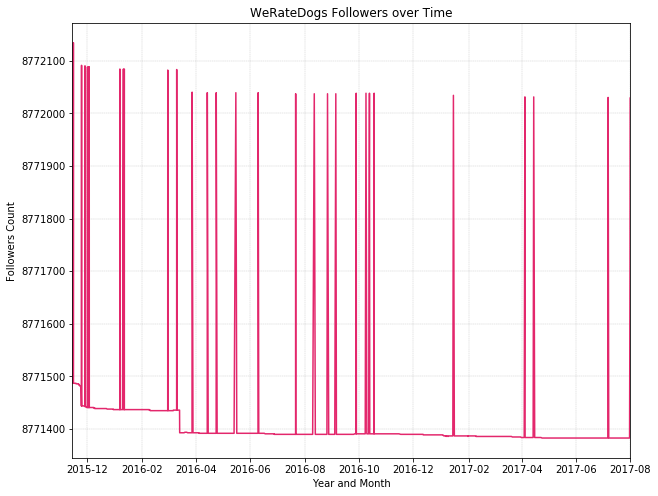

In [83]:
# I want to see how followers count behaves during the period in which the API was running
plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(wrd.timestamp.min()), datetime.date(wrd.timestamp.max())]) 
plt.xlabel('Year and Month')
plt.ylabel('Followers Count')
plt.plot(wrd.timestamp, wrd.followers_count, color = '#e3276c')
plt.grid(color = 'gray', linestyle = '-.', linewidth = '.2')
plt.title('WeRateDogs Followers over Time');
plt.savefig('followers-count')
plt.show();

In [84]:
# Get followers range
dpl(wrd.followers_count.min())
dpl(wrd.followers_count.max())
dpl(wrd.followers_count.max()-wrd.followers_count.min())

8771383

8772134

751

> According to the data, followers count of WeRateDogs fluctuated between 8771383 and 8112134, 751 points during the period of twitter data scrapping, which took approximately 32 minutes.

In [85]:
# Sum tweets count grouped by two weeks basis
fortnightly_tweets = df.reset_index().groupby(pd.Grouper(key = 'timestamp', freq = "SM")).count().reset_index()
fortnightly_tweets = fortnightly_tweets[['timestamp', 'index']]
fortnightly_tweets['tweets'] = fortnightly_tweets['index']
fortnightly_tweets = fortnightly_tweets.drop('index', axis = 1)
fortnightly_tweets.head()

,timestamp,tweets
0,2015-11-15,278
1,2015-11-30,233
2,2015-12-15,136
3,2015-12-31,88
4,2016-01-15,79


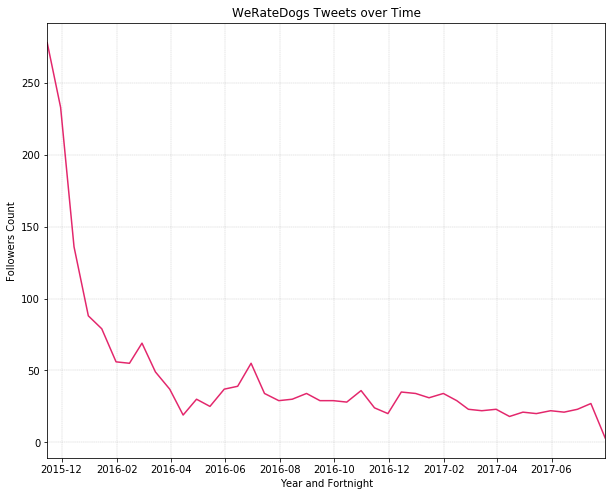

In [86]:
# Plot tweets over time
plt.figure(figsize=(10, 8))
plt.xlim([datetime.date(fortnightly_tweets.timestamp.min()), datetime.date(fortnightly_tweets.timestamp.max())]) 
plt.xlabel('Year and Fortnight')
plt.ylabel('Followers Count')
plt.plot(fortnightly_tweets.timestamp, fortnightly_tweets.tweets, color = '#e3276c')
plt.grid(color = 'gray', linestyle = '-.', linewidth = '.2')
plt.title('WeRateDogs Tweets over Time');
plt.savefig('tweets-count')
plt.show();

> By the end of 2015, WeRateDogs tweeted over 250 rates in a couple of weeks. That number decreased considerably the following years by tweeting less than 25 rates per week in the summer of 2017.

In [87]:
# I want to lookout for curiosities in the dogs
initial_count = df.name[df.name != 'None'].str[0].value_counts()
initial_count

B    133
C    132
S    127
L     87
M     82
R     81
T     74
D     72
J     71
A     64
K     61
P     59
G     51
O     47
H     42
W     42
F     35
E     30
N     19
Z     13
V      8
I      7
Y      3
Q      1
U      1
Name: name, dtype: int64

> For the tweets with dog names, the most common names for dogs start with 'B', 'C' or 'S'

In [88]:
# Drop unknown names, get first letter and Review
initials = pd.DataFrame(df.name[df.name != 'None'].str[0]).reset_index().drop('index', axis = 1)
initials.head()

,name
0,P
1,T
2,A
3,D
4,F


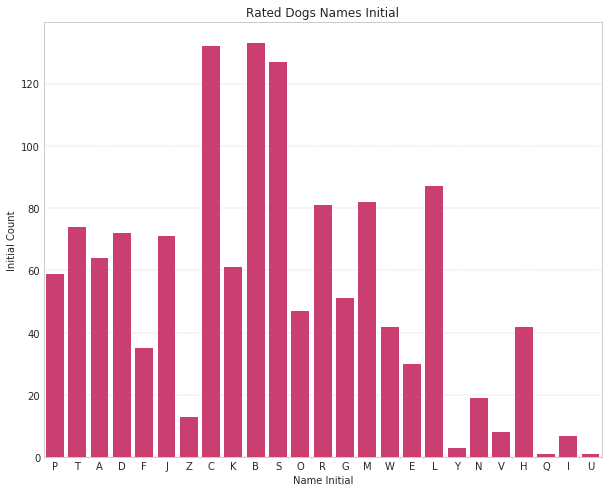

In [89]:
# Plot dogs names initials
sns.set_style("whitegrid")
sns.axes_style("whitegrid")
fig, ax = plt.subplots(figsize = (10,8))
plt.grid(color = 'gray', linestyle = '-.', linewidth = '.2')
p = sns.countplot(data = initials, x = 'name', color = '#e3276c', ax = ax)
ax.set(xlabel='Name Initial', ylabel='Initial Count')
plt.title('Rated Dogs Names Initial')
fig = p.get_figure()
fig.savefig('initials');

In [90]:
# Separate dog breed and ratings
dog_breed = df[['dog_breed','rating']]
dog_breed

,dog_breed,rating
892420643555336193,None,1.30
892177421306343426,chihuahua,1.30
891815181378084864,chihuahua,1.20
891689557279858688,labrador retriever,1.30
891327558926688256,basset,1.20
891087950875897856,chesapeake bay retriever,1.30
890971913173991426,appenzeller,1.30
890729181411237888,pomeranian,1.30
890609185150312448,irish terrier,1.30
890240255349198849,pembroke,1.40


In [91]:
# Sort breeds by rating
dog_breed = dog_breed.sort_values(['rating'], ascending = False)
dog_breed

,dog_breed,rating
749981277374128128,None,177.60
670842764863651840,None,42.00
810984652412424192,golden retriever,3.43
860184849394610176,None,1.40
813812741911748608,french bulldog,1.40
854120357044912130,black-and-tan coonhound,1.40
864873206498414592,None,1.40
884441805382717440,pembroke,1.40
856282028240666624,chihuahua,1.40
755206590534418437,None,1.40


In [92]:
# Best rated dog! Image recognition cannot do its job because this dog is fully dressed! I think it is a golden retriever
# How could not be?
import urllib.request
top1name = df.name[749981277374128128]
top1tweet = df.text[749981277374128128]
dpl(top1name)
dpl(img(url = df.jpg_url.at[749981277374128128]))
dpl(top1tweet)
urllib.request.urlretrieve(df.jpg_url.at[749981277374128128], top1name+'-top1-dog.png');

'Atticus'

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [93]:
# Second best rated tweet
top2name = df.name[670842764863651840]
top2tweet = df.text[670842764863651840]
dpl(top2name)
dpl(img(url = df.jpg_url.at[670842764863651840])) # Haha, Snoop 'Dog'g is our second best dog
dpl(top2tweet)
urllib.request.urlretrieve(df.jpg_url.at[670842764863651840], top2name+'-top2-dog.png')

'None'

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

('None-top2-dog.png', <http.client.HTTPMessage at 0x7f3280702128>)

In [94]:
# Third best rated dog
top3name = df.name[810984652412424192]
top3tweet = df.text[810984652412424192]
dpl(top3name)
dpl(img(url = df.jpg_url.at[810984652412424192])) # Best rated dog for our known breeds lists! Definately the golden!
dpl(top3tweet)
urllib.request.urlretrieve(df.jpg_url.at[810984652412424192], top3name+'-top3-dog.png')

'Sam'

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

('Sam-top3-dog.png', <http.client.HTTPMessage at 0x7f328440ccc0>)

In [95]:
# Get data to create dog breed chart
dog_breed_chart = df.copy()
dog_breed_chart.dog_breed = dog_breed_chart.dog_breed.astype(str)
dog_breed_chart

,timestamp,text,expanded_urls,name,jpg_url,img_num,favorite_count,lang,retweet_count,dog_stage,rating,dog_breed
892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,36309,en,7729,NaN,1.30,None
892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,31298,en,5720,NaN,1.30,chihuahua
891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,23578,en,3786,NaN,1.20,chihuahua
891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,39618,en,7890,NaN,1.30,labrador retriever
891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,37819,en,8508,NaN,1.20,basset
891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,19050,en,2851,NaN,1.30,chesapeake bay retriever
890971913173991426,2017-07-28 16:27:12,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,11092,en,1854,NaN,1.30,appenzeller
890729181411237888,2017-07-28 00:22:40,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,61187,en,17248,NaN,1.30,pomeranian
890609185150312448,2017-07-27 16:25:51,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,26212,en,3925,NaN,1.30,irish terrier
890240255349198849,2017-07-26 15:59:51,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,29964,en,6717,doggo,1.40,pembroke


In [96]:
# Get data to create dog breed chart (cont.)
dog_breed_chart = df.copy()
dog_breed_chart.dog_breed = dog_breed_chart.dog_breed.astype(str)
dog_breed_chart = dog_breed_chart.dog_breed.value_counts().rename_axis('breed').to_frame('counts')
dog_breed_chart = dog_breed_chart.reset_index()
dog_breed_chart.breed[11:] = 'Other'
dog_breed_chart.breed = dog_breed_chart.breed.str.title() # Title case the names for the chart labels
dog_breed_chart = dog_breed_chart.groupby(['breed'])['counts'].sum().to_frame()
dog_breed_chart

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,counts
breed,
Chihuahua,90
Chow,48
Golden Retriever,156
Labrador Retriever,104
Malamute,33
None,305
Other,941
Pembroke,94
Pomeranian,41


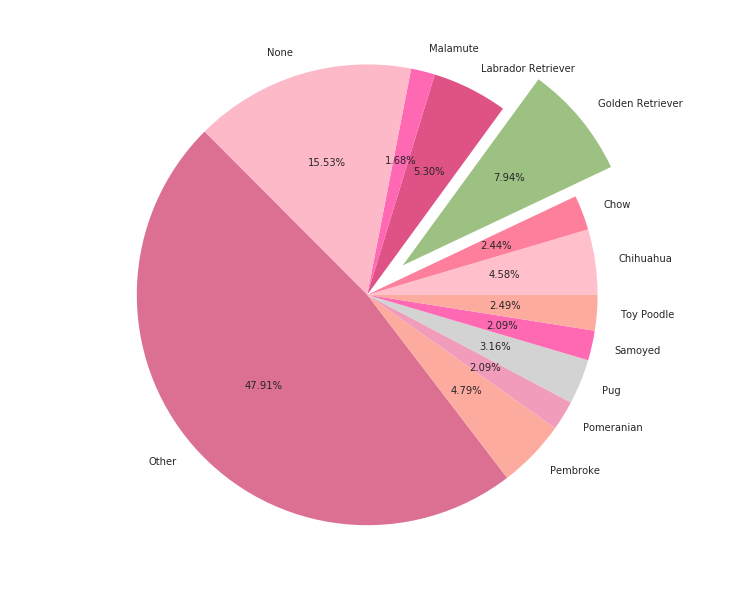

In [97]:
# Chart breed of rated dogs
fig2 = plt.figure(figsize=(10, 8))
colors = ['pink', '#FE7F9C', '#9dc183','#DF5286','hotpink','#fdb9c8','palevioletred', '#FDAB9F', '#F19CBB', 'lightgray','hotpink', '#FDAB9F']
explode = (0,0,0.2,0,0,0,0,0,0,0,0,0)
ax = fig2.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(dog_breed_chart.counts, explode=explode, labels = dog_breed_chart.index ,autopct='%1.2f%%', colors = colors)
plt.savefig('breeds')
plt.show();

> There are 15.53 % of tweets whose breed are unknown. And the outstanding recurrent breed is the Golden Retriever.

In [98]:
# Get data for best rated by dog stage
dogstage = df[['dog_stage','dog_breed','rating']]
dogstage.dog_stage.fillna('unknown', inplace = True)
dogstage.sort_values('rating', ascending = False, inplace = True)
dogstage.reset_index(inplace = True)
dogstage = dogstage[dogstage.dog_stage != 'unknown']
dogstage = pd.pivot_table(dogstage, values='rating', index=['dog_stage','dog_breed'])
dogstage

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


rating
dog_stage dog_breed                             
doggo     None                              1.13
          basset                            1.05
          beagle                            1.10
          bedlington terrier                1.10
          blenheim spaniel                  1.10
          border collie                     1.30
          boston bull                       1.10
          boxer                             1.30
          briard                            1.20
          chesapeake bay retriever          1.30
          chihuahua                         1.15
          cocker spaniel                    1.15
          curly-coated retriever            1.30
          dalmatian                         0.85
          dandie dinmont                    1.30
          english springer                  1.10
          eskimo dog                        1.30
          german shepherd                   1.13
          german short-haired pointer       1.10
          golden retriever                  1.21
          great dane                        1.10
          great pyrenees                    1.30
          irish setter                      1.40
          komondor                          1.20
          labrador retriever                1.22
          norwegian elkhound                1.10
          old english sheepdog              1.20
          pembroke                          1.40
          pomeranian                        1.15
          schipperke                        1.20
...                                          ...
pupper    shetland sheepdog                 1.10
          shih-tzu                          1.05
          siberian husky                    1.15
          soft-coated wheaten terrier       0.90
          staffordshire bullterrier         1.00
          tibetan mastiff                   1.30
          toy poodle                        1.07
          vizsla                            1.20
          walker hound                      0.90
          whippet                           0.90
          yorkshire terrier                 0.90
puppo     None                              1.30
          airedale                          1.00
          american staffordshire terrier    1.30
          bernese mountain dog              1.30
          cardigan                          1.30
          chow                              1.10
          eskimo dog                        1.20
          flat-coated retriever             1.25
          german shepherd                   1.30
          golden retriever                  1.28
          labrador retriever                1.10
          lakeland terrier                  1.30
          malamute                          1.00
          miniature pinscher                1.20
          old english sheepdog              0.90
          pembroke                          1.30
          rottweiler                        1.40
          shetland sheepdog                 1.30
          siberian husky                    1.20

[126 rows x 1 columns]

In [99]:
# Get dog stage names
d = list(set(dogstage.index.get_level_values(0)))
d

['floofer', 'puppo', 'pupper', 'doggo']

In [100]:
# Get the top rated breeds for each dog stage
for x in d:
    print(x.title())
    c = dogstage['rating'][x].to_frame()
    c = c.sort_values('rating', ascending = False)
    dpl(c.head(3))
    print('---------------------------\n')

Floofer


,rating
dog_breed,
chow,1.30
samoyed,1.30
golden retriever,1.20


---------------------------

Puppo


,rating
dog_breed,
rottweiler,1.40
None,1.30
lakeland terrier,1.30


---------------------------

Pupper


,rating
dog_breed,
black-and-tan coonhound,1.40
saluki,1.30
tibetan mastiff,1.30


---------------------------

Doggo


,rating
dog_breed,
irish setter,1.40
pembroke,1.40
chesapeake bay retriever,1.30


---------------------------



> The top rated breeds for each dog stage are the following:

| Doggo | Puppo | Floofler | Pupper |
| --- | --- | --- | --- |
| Irish Setter : 1.40 |Rottweiler : 1.40 | Chow: 1.30 | Black-and-tan Coonhound : 1.40 |
| Pembroke : 1.40 | &#xfeff; | Samoyed : 1.30 | &#xfeff; |

<a id='insights'></a>
### Insights


Well, this has been an interesting dataset. After dealing with unreadable data, encounter myself with data within data, cleaning all of that and be able to take a deeper look onto the real information, I found out a couple of interesting things.

To begin, I decided to check the behavior of the followers of WeRateDogs while I was running the twitter API. By the starting point, the accound had the maximum followers count for the period, with 8.772.134 followers, and this number fluctuated during the following minutes by 751 points, going up and down, being the minimum 8.771.383 followers by the end of this period. The odd thing about this is how many times it went 751 points up and down in so few minutes. It was like 751 people were playing with the "follow" button te see how many spikes I would have in my chart.

Then I went over to check the number of dog rates that was published every two weeks in the twitter account of WeRateDogs, and it is evident that the account was trying to get as much followers as possible at the begining, publishing over 250 rates every 2 weeks. After just a couple of months that number dropped cosiderably and stayed between 20 and 50 rates every 2 weeks for the next few years. This behavior was observed for the period for which we  have information, approximately between winter of 2015 and summer of 2017.

Another random fact that I had fun with just thinking about it, was to find the most common initial in the rated dogs names. There are dog names with almost every letter in the alphabet, missing only I think the X. But the winners here are the B, C and S.. with over 120 dogs rated for each letter! More than 120 rated whose names began with the letter B, more than 120 rated whose names began with the letter C, and te same for S! It may not be a critical information from this data, but I found it out interesting to tell. ```¯\_(ツ)_/¯``` 

The best for the end, of course this is a data were WeRateDogs, then I think everyone wants to know who the best rated dogs are.
I would like to start the awards with the best rated dog breeds in each dog stage, which they are 'doggo', 'puppo', 'floofer' and 'pupper'. In the Doggo category we have a tie between the Irish Setter and the Pembroke, both with a rating of 1.4. For the Puppo stage, the winner is the Rottweiler with a rating of 1.4. Followed by the Black-and-ran Coonhound rated with 1.4 as a Pupper, and finally, another tie for the Floofer stage with a rating of 1.3, we have the Chow and the Samoyed.

So this are the best rated breeds? Actually, no. The issue with this data, is that not all the rates contain the dog stage information, in fact, only 16.29% of the rates included the dog stage. For that matter, the previous award is not that well deserved. Let's keep the quest to find the best rated breeds then!

There are 15.53% of rated dogs whose breeds we do not know, I do not think that this would be relevant to the result which says that the most common rated dog breed is the Golden Retriever ```#WeLoveGolden```. But wait, I want to know who the best rated dogs are, and we are going to find it!

For the top 3 dogs I will go from bottom to top, for the top 3 in third place we have... Sam! "She smiles 24/7", this is a Golden Retriever.

In second place we have...
...wait what? This is Snoop Dogg, ```☜(⌒▽⌒)☞``` this is a "Good Dogg". I do not think there is a breed for Snoop Dogg, don't you think?

Finally, the last but not least, we have the best of the bests, the guardian of lost souls, the powerful, the pleasurable, the indestructible... Atticus! "He's quite simply America". Image recognition did not work with him because Atticus is fully dressed, but I bet he is a Golden Retriver!

<a id='conclusion'></a>
### Conclusion

What is at the eyesight does not need glasses. We can definately say the best rated dogs are **Golden Retrievers**. Why? ```◖ᵔᴥᵔ◗``` Because "they're good dogs Brent."

[Go Back to the top][1]

[1]:#table_of_contents

In [101]:
# Time at the end of the code to track elapsed time
elapsed = round((time.time() - notebk_time)/60, 2)
print('----- Completed in {} minutes -----'.format(elapsed))

----- Completed in 0.25 minutes -----


In [102]:
#Convert notebook into html file
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0